Pull distributions

In [1]:
import pandas
import uproot
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import pickle

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
N_Z0 = np.array([5e11, 1e12, 2e12, 3e12, 4e12, 5e12])

In [4]:
N_SIG_5e12 = 4009.2649482816005
sig_yield_5e12 = 4010
err_sig_yield_5e12 = 125.2

N_SIG_4e12 = 3207.4119586252805
sig_yield_4e12 = 3214
err_sig_yield_4e12 = 110.6

N_SIG_3e12 = 2405.55896896896
sig_yield_3e12 = 2403
err_sig_yield_3e12 = 98.76

N_SIG_2e12 = 1603.7059793126402
sig_yield_2e12 = 1607
err_sig_yield_2e12 = 80.78

N_SIG_1e12 = 801.8529896563201
sig_yield_1e12 = 804
err_sig_yield_1e12 = 57.34

N_SIG_5e11 = 400.92649482816006
sig_yield_5e11 = 399.2
err_sig_yield_5e11 = 40.26

GEN_SIG = np.array([N_SIG_5e11, N_SIG_1e12, N_SIG_2e12, N_SIG_3e12, N_SIG_4e12, N_SIG_5e12])
FIT_SIG = np.array([sig_yield_5e11, sig_yield_1e12, sig_yield_2e12, sig_yield_3e12, sig_yield_4e12, sig_yield_5e12])
FIT_ERR_SIG = np.array([err_sig_yield_5e11, err_sig_yield_1e12, err_sig_yield_2e12, err_sig_yield_3e12, err_sig_yield_4e12, err_sig_yield_5e12])


NameError: name 'ERR_SIG' is not defined

In [7]:
N_BU_BKG_5e12 = 241.47796710240002
bu_bkg_yield_5e12 = 241.6
err_bu_bkg_yield_5e12 = 5.638

N_BU_BKG_4e12 = 193.18237368191998
bu_bkg_yield_4e12 = 193.8
err_bu_bkg_yield_4e12 = 5.21

N_BU_BKG_3e12 = 144.88678026144
bu_bkg_yield_3e12 = 144.7
err_bu_bkg_yield_3e12 = 4.232

N_BU_BKG_2e12 = 96.59118684095999
bu_bkg_yield_2e12 = 96.89
err_bu_bkg_yield_2e12 = 3.47

N_BU_BKG_1e12 = 48.295593420479996
bu_bkg_yield_1e12 = 48.3
err_bu_bkg_yield_1e12 = 2.444

N_BU_BKG_5e11 = 24.147796710239998
bu_bkg_yield_5e11 = 24.18
err_bu_bkg_yield_5e11 = 1.545

GEN_BU = np.array([N_BU_BKG_5e11, N_BU_BKG_1e12, N_BU_BKG_2e12, N_BU_BKG_3e12, N_BU_BKG_4e12, N_BU_BKG_5e12])
FIT_BU = np.array([bu_bkg_yield_5e11, bu_bkg_yield_1e12, bu_bkg_yield_2e12, bu_bkg_yield_3e12, bu_bkg_yield_4e12, bu_bkg_yield_5e12])
FIT_ERR_BU = np.array([err_bu_bkg_yield_5e11, err_bu_bkg_yield_1e12, err_bu_bkg_yield_2e12, err_bu_bkg_yield_3e12, err_bu_bkg_yield_4e12, err_bu_bkg_yield_5e12])

In [8]:
N_INC_BKG_5e12 = 4231.413002270805
inc_bkg_yield_5e12 = 4227
err_inc_bkg_yield_5e12 = 126.3

N_INC_BKG_4e12 = 3385.130401816644
inc_bkg_yield_4e12 = 3380
err_inc_bkg_yield_4e12 = 110.5

N_INC_BKG_3e12 = 2538.8478013624826
inc_bkg_yield_3e12 = 2537
err_inc_bkg_yield_3e12 = 96.21

N_INC_BKG_2e12 = 1692.565200908322
inc_bkg_yield_2e12 = 1689
err_inc_bkg_yield_2e12 = 79.08

N_INC_BKG_1e12 = 846.282600454161
inc_bkg_yield_1e12 = 844.4
err_inc_bkg_yield_1e12 = 55.41

N_INC_BKG_5e11 = 423.1413002270805
inc_bkg_yield_5e11 = 424
err_inc_bkg_yield_5e11 = 40.4

GEN_INC_BKG = np.array([N_INC_BKG_5e11, N_INC_BKG_1e12, N_INC_BKG_2e12, N_INC_BKG_3e12, N_INC_BKG_4e12, N_INC_BKG_5e12])
FIT_INC_BKG = np.array([inc_bkg_yield_5e11, inc_bkg_yield_1e12, inc_bkg_yield_2e12, inc_bkg_yield_3e12, inc_bkg_yield_4e12, inc_bkg_yield_5e12])
FIT_ERR_INC_BKG = np.array([err_inc_bkg_yield_5e11, err_inc_bkg_yield_1e12, err_inc_bkg_yield_2e12, err_inc_bkg_yield_3e12, err_inc_bkg_yield_4e12, err_inc_bkg_yield_5e12])

In [9]:
Pull_Sig = (FIT_SIG - GEN_SIG) / FIT_ERR_SIG
Pull_Bu = (FIT_BU - GEN_BU) / FIT_ERR_BU
Pull_Inc_Bkg = (FIT_INC_BKG - GEN_INC_BKG) /FIT_ERR_INC_BKG

sigma_sig = 0 
mean_sig = 0
for elt in Pull_Sig :
    sigma_sig += elt**2
    mean_sig += elt

mean_sig = mean_sig/len(Pull_Sig)
sigma_sig = sigma_sig/len(Pull_Sig)
sigma_sig = sigma_sig - mean_sig**2
sigma_sig = np.sqrt(sigma_sig)

In [26]:
Mean_Sig = np.mean(Pull_Sig)
Sigma_Sig = np.std(Pull_Sig) 

print(Mean_Sig)
print(Sigma_Sig)

Mean_Bu = np.mean(Pull_Bu)
Sigma_Bu = np.std(Pull_Bu) 

print(Mean_Bu)
print(Sigma_Bu)

Mean_Inc_Bkg = np.mean(Pull_Inc_Bkg)
Sigma_Inc_Bkg = np.std(Pull_Inc_Bkg) 

print(Mean_Inc_Bkg)
print(Sigma_Inc_Bkg)

0.012477326994512957
0.037021929101561483
 
0.012477326994512957
0.037021929101561483
0.03413594746789528
0.053745184352030434
-0.02639664673700598
0.023105973489183525


In [14]:
colour_bc = "#fdae61"
colour_bu = "#74add1"
colour_bb_cc = "#4575b4"

No handles with labels found to put in legend.


[]

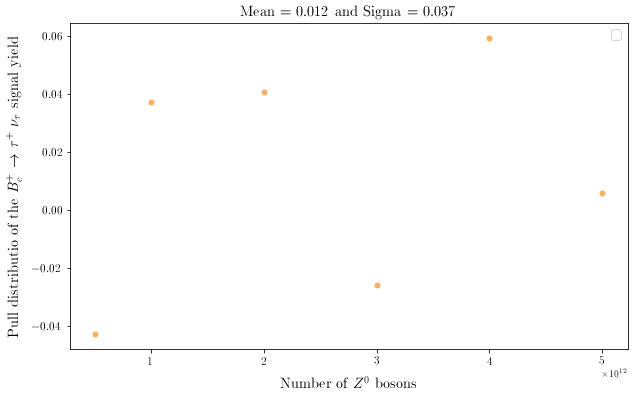

In [36]:
plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             Pull_Sig, 
             #yerr = ERR_SIG,
             fmt = 'o', 
             markersize = 5,
             color = colour_bc 
             #label = "Fit value"
            )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"Pull distributio of the $B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ signal yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)
plt.title("Mean = {} and Sigma = {}".format(round(Mean_Sig,3), round(Sigma_Sig,3)), fontsize=15)

plt.plot()

No handles with labels found to put in legend.


[]

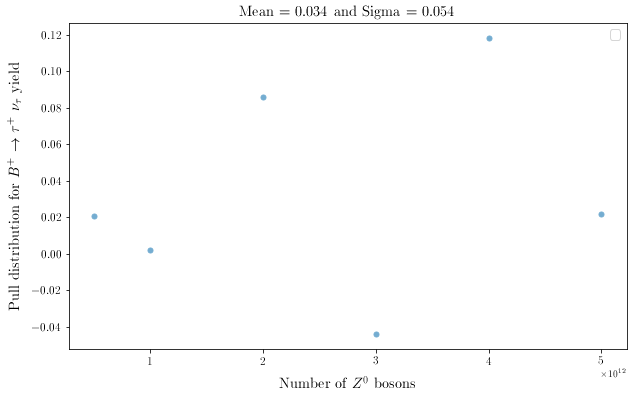

In [34]:
plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             Pull_Bu, 
             #yerr = ERR_BU,
             fmt = 'o', 
             markersize = 5,
             color = colour_bu, 
             #label = "Fit value"
            )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"Pull distribution for $B^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)
plt.title("Mean = {} and Sigma = {}".format(round(Mean_Bu,3), round(Sigma_Bu,3)), fontsize=15)

plt.plot()

No handles with labels found to put in legend.


[]

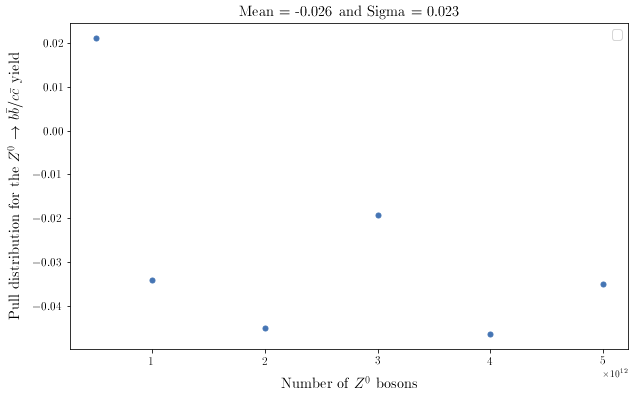

In [39]:
plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             Pull_Inc_Bkg, 
             #yerr = ERR_INC_BKG,
             fmt = 'o', 
             markersize = 5,
             color = colour_bb_cc 
             #label = "Fit value"
             )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"Pull distribution for the $Z^0$ $\rightarrow$ $b\bar{b}$/$c\bar{c}$ yield ", fontsize=15, labelpad=10)
#plt.xscale('log')
#plt.yscale('log')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)
plt.title("Mean = {} and Sigma = {}".format(round(Mean_Inc_Bkg,3), round(Sigma_Inc_Bkg,3)), fontsize=15)

plt.plot()